# Housing Prices in São Paulo

This notebook gathers information about housing prices and their sizes on the city of São Paulo, Brazil.

In [1]:
# Import Libraries
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib notebook

This dataset is gathering information from [Imovel Web](http://www.imovelweb.com.br/imoveis-venda-sao-paulo-sp-pagina-1.html), a brazilian online real estate portal. The function belows creates a new URL in each loop iteration.

In [2]:
def getURL(page_number):
    base_url = "http://www.imovelweb.com.br/imoveis-venda-sao-paulo-sp-pagina-"
    end_url = ".html"
    url = base_url + str(page_number) + end_url
    return url

In [3]:
def num(s):
    try:
        return int(s)
    except ValueError:
        return float(s)

The function below requests a url, passes the page to [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) that in turn scrapes each data item from a this page. Each new item is added to a [pandas](https://pandas.pydata.org) series that is then appended to a dataset for later use.

In [4]:
def grab_data(url, i):
    try:
        result = requests.get(url)
        page = BeautifulSoup(result.content, "html5lib")
        items = page.find_all('li', class_='post')
        for item in items:
            title = item.find("a", class_='dl-aviso-link').get('title')
            price = item.find("span", class_='precio-valor').string.replace("R$","").replace(".","").strip()
            size = item.find("li", class_='post-m2totales')
            if size is not None:
                size = size.text.replace("total","").strip()
                #print(size + " - " + price + " - " + title)
                price = num(str(price))/1000
                size = num(str(size.replace("m²","")))
                df.loc[i] = [size, price]
                i = i + 1
        return i
    except:
        print("--> ERROR")
        return i

Below is the actual program loop. It will grab data from *n* number of pages using the ```grab_data()``` function. While this is happening, the program prints the current URL that is beign scraped or prints an error message. If an error occurs, the program will continue scraping from the next link.

In [5]:
df = pd.DataFrame([], columns=('size', 'price'))
i = 0
for page_number in  range(1,100):
    url = getURL(page_number)
    print(str(page_number) + " - " + url)
    i = grab_data(url, i)
df.tail()       

1 - http://www.imovelweb.com.br/imoveis-venda-sao-paulo-sp-pagina-1.html
2 - http://www.imovelweb.com.br/imoveis-venda-sao-paulo-sp-pagina-2.html
3 - http://www.imovelweb.com.br/imoveis-venda-sao-paulo-sp-pagina-3.html
4 - http://www.imovelweb.com.br/imoveis-venda-sao-paulo-sp-pagina-4.html
5 - http://www.imovelweb.com.br/imoveis-venda-sao-paulo-sp-pagina-5.html
6 - http://www.imovelweb.com.br/imoveis-venda-sao-paulo-sp-pagina-6.html
7 - http://www.imovelweb.com.br/imoveis-venda-sao-paulo-sp-pagina-7.html
8 - http://www.imovelweb.com.br/imoveis-venda-sao-paulo-sp-pagina-8.html
9 - http://www.imovelweb.com.br/imoveis-venda-sao-paulo-sp-pagina-9.html
10 - http://www.imovelweb.com.br/imoveis-venda-sao-paulo-sp-pagina-10.html
11 - http://www.imovelweb.com.br/imoveis-venda-sao-paulo-sp-pagina-11.html
12 - http://www.imovelweb.com.br/imoveis-venda-sao-paulo-sp-pagina-12.html
13 - http://www.imovelweb.com.br/imoveis-venda-sao-paulo-sp-pagina-13.html
14 - http://www.imovelweb.com.br/imoveis-ve

,size,price
1084,69.0,480.0
1085,103.0,945.0
1086,56.0,650.0
1087,81.0,800.0
1088,70.0,35.0


The next snippet creates a plot with the data gathered in the previous step.

<IPython.core.display.Javascript object>


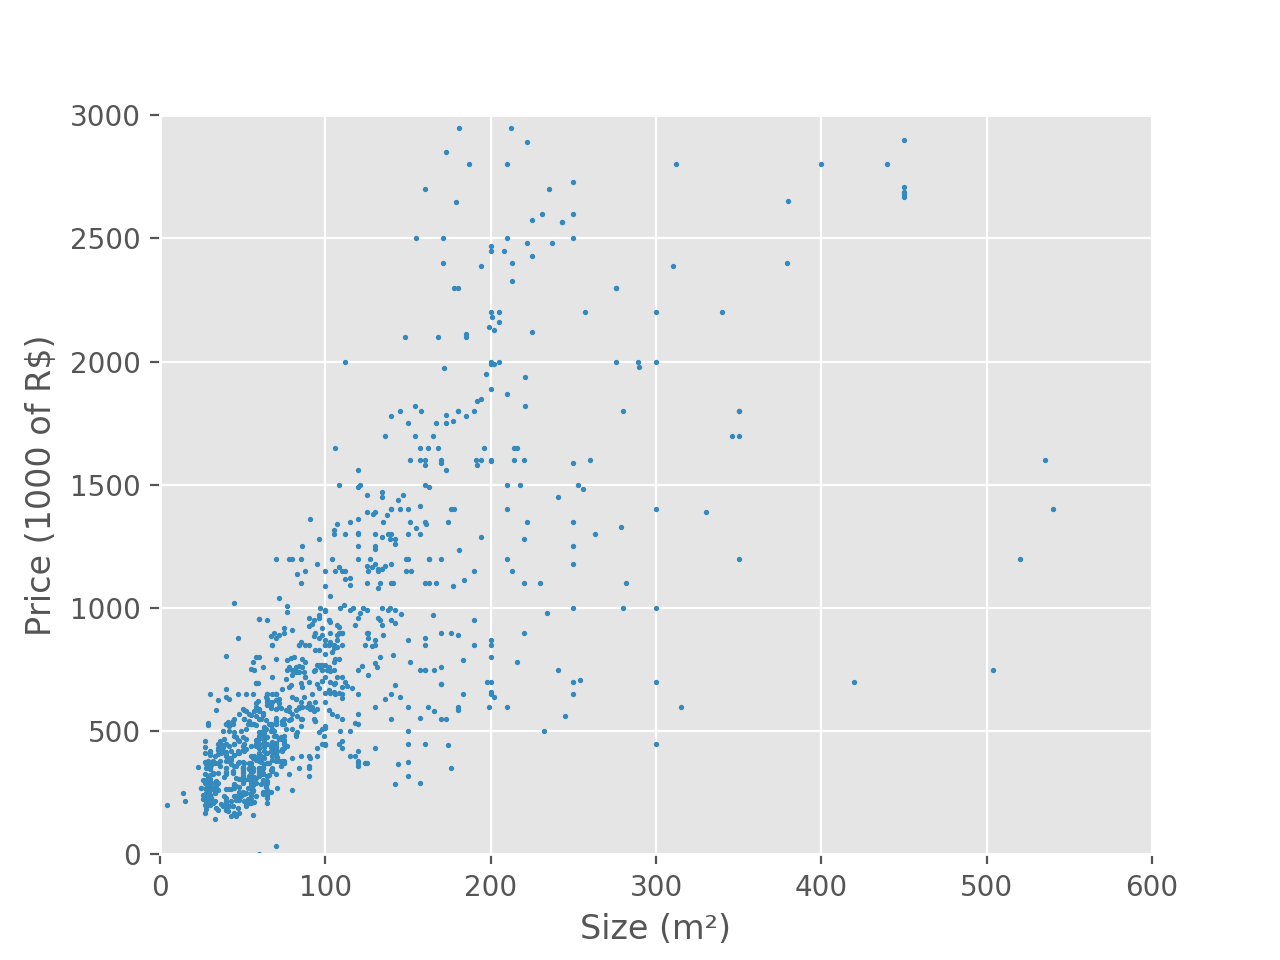

In [28]:
df.plot(x="size",  y="price", s=2, kind='scatter', xlim=(0, 600), ylim=(0, 3000), style="o")
plt.xlabel("Size (m²)")
plt.ylabel("Price (1000 of R$)")

In [31]:
filename = 'housing-prices-sao-paulo.txt'
df.to_csv(filename, index=False, encoding='utf-8')
saved_data = pd.read_csv(filename, sep=" ", header = None)
saved_data.head()

,0
0,"size,price"
1,"100.0,1150.0"
2,"102.0,760.0"
3,"63.0,519.0"
4,"30.0,278.2"
